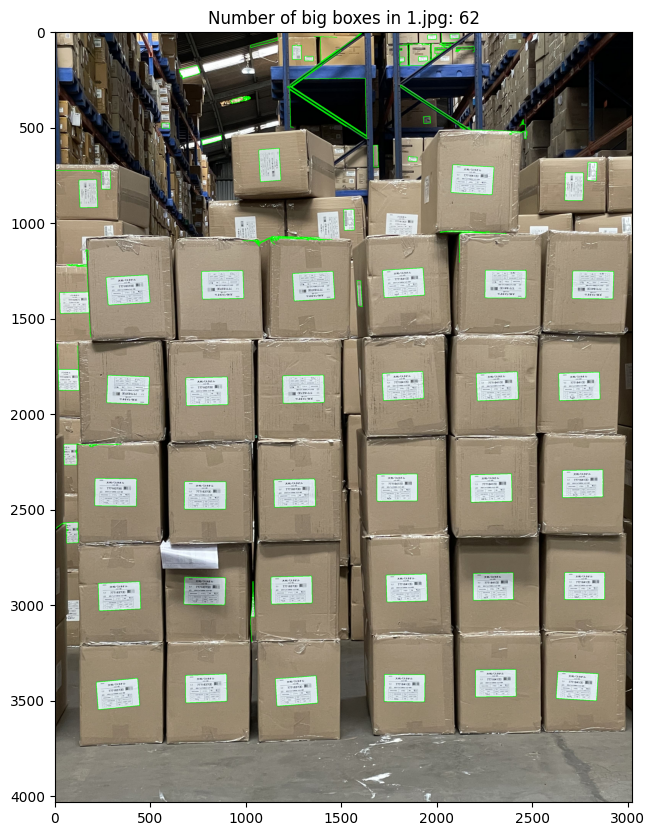

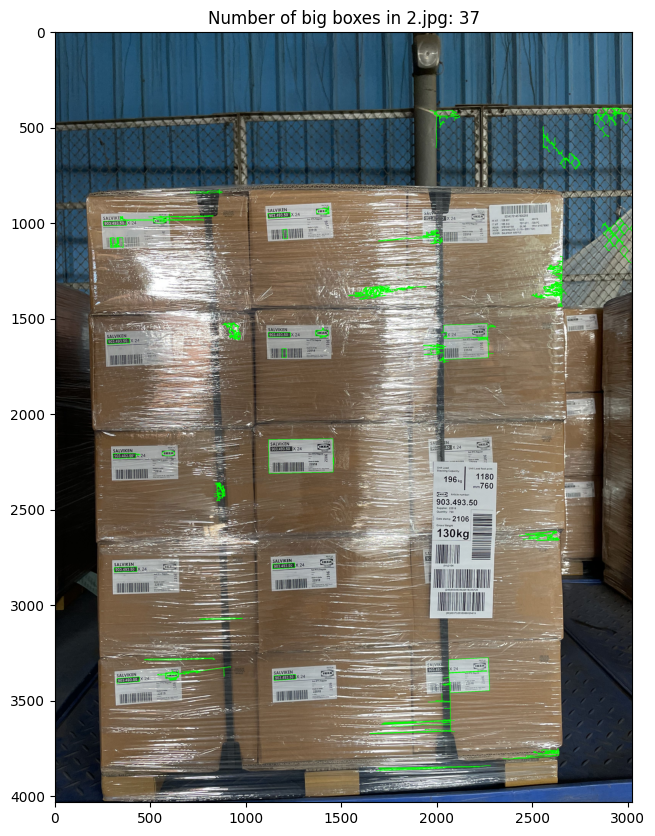

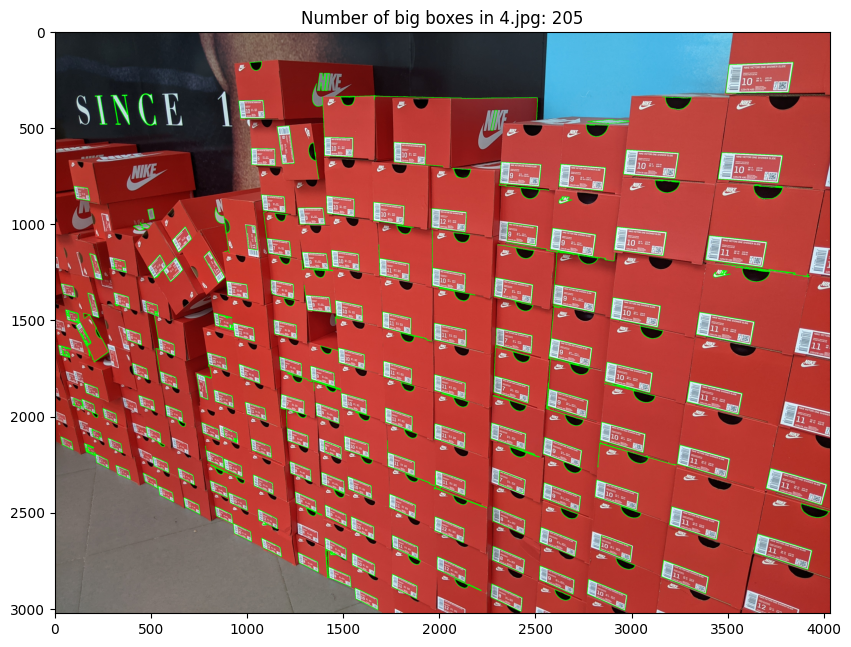

Total number of big boxes in all images: 304


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to count big boxes in all images in a folder
def count_big_boxes(folder_path, size_threshold=1000):
    # Iterate through all files in the folder
    num_big_boxes_total = 0
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust as per your image types
            image_path = os.path.join(folder_path, filename)
            
            # Load the image
            image = cv2.imread(image_path)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Apply edge detection
            edges = cv2.Canny(gray, 50, 150, apertureSize=3)

            # Find contours
            contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Filter contours based on size (area)
            big_boxes = [cnt for cnt in contours if cv2.contourArea(cnt) > size_threshold]

            # Draw contours of big boxes on the original image
            image_contours = image.copy()
            cv2.drawContours(image_contours, big_boxes, -1, (0, 255, 0), 2)

            # Display the image with big boxes contours
            plt.figure(figsize=(10, 10))
            plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
            plt.title(f'Number of big boxes in {filename}: {len(big_boxes)}')
            plt.show()

            # Accumulate the count of big boxes across all images
            num_big_boxes_total += len(big_boxes)

    return num_big_boxes_total

# Example usage:
folder_path = 'Task 7 data'
size_threshold = 1000 # Adjust this threshold based on your specific case

# Count the big boxes in all images in the folder
num_big_boxes_total = count_big_boxes(folder_path, size_threshold)
print(f'Total number of big boxes in all images: {num_big_boxes_total}')